In [1]:
from typing import Tuple

import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from param import *
from util import get_place_cell

output_dir = ParamDir().OUTPUT_ROOT/ "data_exploration/"

In [2]:
def get_place_cell_ratio(data_name):
    # print(data_name)
    with open(output_dir/data_name/"MI_all.pickle","rb") as f:
        results_all = pickle.load(f)

    pc_beh_id, pc_event_id = get_place_cell(results_all, 0.001)

    return len(pc_beh_id)/len(results_all['original MI'])

Text(0.5, 0, 'permutation test')

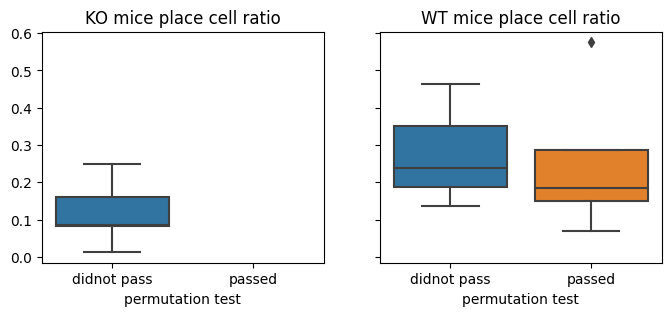

In [7]:
fig, axes = plt.subplots(figsize=(8,3), ncols=2, sharey=True)

KO_names = [] # mice that passed the test
pass_res_KO = []
not_pass_res_KO = []
KO_data_list = [data_dir for data_dir in ParamDir().data_list if "KO" in str(data_dir).split('/')[-1]]
for data_dir in KO_data_list:
    data_name = str(data_dir).split('/')[-1]
    ratio = get_place_cell_ratio(data_name)
    if data_name not in KO_names:
        not_pass_res_KO.append([ratio, data_name])
    else:
        pass_res_KO.append([ratio, data_name])

sns.boxplot([[i[0] for i in not_pass_res_KO], [i[0] for i in pass_res_KO]], ax=axes[0])
axes[0].set_xticklabels(["didnot pass", "passed"])
axes[0].set_title("KO mice place cell ratio")
axes[0].set_xlabel("permutation test")

WT_names = ["M45_042718_OF", "M46_042718_OF", "081117 OF B6J M27-n1"] # mice that didn't pass the test
pass_res_WT = []
not_pass_res_WT = []
WT_data_list = [data_dir for data_dir in ParamDir().data_list if "KO" not in str(data_dir).split('/')[-1]]
for data_dir in WT_data_list:
    data_name = str(data_dir).split('/')[-1]
    ratio = get_place_cell_ratio(data_name)
    if data_name in WT_names:
        not_pass_res_WT.append([ratio, data_name])
    else:
        pass_res_WT.append([ratio, data_name])
sns.boxplot([[i[0] for i in not_pass_res_WT], [i[0] for i in pass_res_WT]], ax=axes[1])
axes[1].set_xticklabels(["didnot pass", "passed"])
axes[1].set_title("WT mice place cell ratio")
axes[1].set_xlabel("permutation test")

In [4]:
print(f"passed: \n {pass_res_KO} \ndidnot pass: \n {not_pass_res_KO}")

passed: 
 [] 
didnot pass: 
 [[0.25, '091317 OF CaMKII HKO M19-n1'], [0.08620689655172414, '092217 OF CaMKII HKO M30-n1'], [0.012345679012345678, '091317 OF CaMKII HKO M20-n1'], [0.08333333333333333, 'CK_KO_RN1_OF'], [0.15942028985507245, '090817 OF CaMKII HKO M22-n1']]


In [5]:
print(f"passed: \n {pass_res_WT} \ndidnot pass: \n {not_pass_res_WT}")

passed: 
 [[0.06896551724137931, 'CK_WT_RN3_OF'], [0.19047619047619047, '092217 OF CaMKII WT M29-n1'], [0.5757575757575758, 'M44_042718_OF'], [0.17721518987341772, '092717 OF SERT WT M32-n1']] 
didnot pass: 
 [[0.13636363636363635, 'M45_042718_OF'], [0.23863636363636365, 'M46_042718_OF'], [0.4642857142857143, '081117 OF B6J M27-n1']]
